In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount("/content/drive")
datos = "/content/drive/MyDrive/datos dojo/sales_predictions.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv(datos)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) ¿cuantas filas y columnas?

In [3]:
total = df.shape
total

(8523, 12)

2) ¿Cuáles son los tipos de datos en cada variable?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados

In [5]:
df.duplicated().sum()

0

4) Identifiquen los valores faltantes.

In [6]:
df["Item_Weight"].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [7]:
df["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [8]:
r1 = df["Outlet_Size"].isna()
r2 = df["Item_Weight"].isna()
df[r1 | r2 ]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e70383e90>,
      dtype=object)

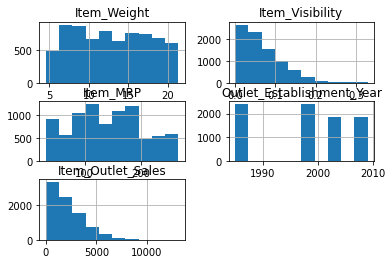

In [10]:
df.hist()

In [11]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [12]:
df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Item_Weight                     4.643456
Item_Visibility                 0.051598
Item_MRP                       62.275067
Outlet_Establishment_Year       8.371760
Item_Outlet_Sales            1706.499616
dtype: float64

In [13]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Item_Weight                    12.857645
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64

In [14]:

df.describe(include="all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


1- No existen correlaciones fuertes para determinar valores faltantes por intrtpolación lineal. 2- las columnas tienen un variación alta en su rango de datos (es una alta desviación estandar), por ende no correcto reemplazar valores faltantes con el promedio. 3- Es arriesgado reemplazar valores faltantes con valores al azar

Se opta por eliminar los registros con valores faltantes. Y así no dañar la integridad de los datos.

In [15]:
df = df.dropna()

6) Confirmen que no hay valores faltantes después de abordarlos.

In [16]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Encuentren y arreglen alguna categoría inconsistente de datos (ejemplo: arreglar cat, Cat, y cats para que sean consistentes)

In [17]:
for columna in df.columns:
  print(columna)
  print(df[columna].unique())
  print()

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'FDC28' 'FDV31' 'FDO03']

Item_Weight
[ 9.3    5.92  17.5    8.93  10.395 13.65  11.8   18.5   15.1   17.6
 16.35   9.    13.35  18.85  14.6   13.85   7.645 11.65  18.6   18.7
 10.     8.85   9.8   13.6   21.35  12.15  15.85   7.39  10.195  9.895
  7.905  8.365 19.35   8.645 15.6    7.825  8.39  12.85   7.76  16.75
  6.055  6.305 20.85   8.895 19.7    8.75   8.31  19.75  17.1   10.5
 14.15  13.3    7.5    7.485  8.6   17.7    8.88  13.5    7.855  7.235
  8.02  16.6   14.    16.    21.25   7.365 18.35   5.465  5.905  7.27
  6.155 12.6   14.5   13.1    5.75  11.35   6.525 10.3    5.78  19.
  5.26   9.5   13.8   17.2    6.32   4.88  12.65  20.75   7.55  13.
 12.3   14.1   12.    10.1    7.785 12.8    7.63   7.975 15.7    8.985
 20.35   6.59  19.85  16.85   6.26  20.25   8.695  7.075  8.195  7.09
  6.095  6.15  17.85   6.445 19.1   15.     6.67  16.7    9.695 20.7
  5.5   17.35   7.285  6.17  19.5   19.2   11.395  7.97   7.71  19.25
 11.6   12.1

In [18]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'reg', 'LF'], dtype=object)

In [19]:
r1 = df["Item_Fat_Content"] == "low fat"
r2 = df["Item_Fat_Content"] == "LF"
df.loc[r1 | r2, "Item_Fat_Content"] = "Low Fat"
r3 = df["Item_Fat_Content"] == "reg"
df.loc[r3, "Item_Fat_Content"] = "Regular"

In [20]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

8) Para cualquier columna numérica, obtendrán las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [21]:
df.describe().loc[["min", "max", "mean"]]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,4.555000,0.000000,31.490000,1987.000000,69.243200
max,21.350000,0.188323,266.888400,2009.000000,10256.649000
mean,12.898675,0.060700,141.716328,1999.190538,2272.037489


Proyecto 1 - Parte 3 (base)

Histograma para ver las distribuciones de diversas características en el conjunto de datos.

Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.

Mapa de calor de la conexión entre las características.

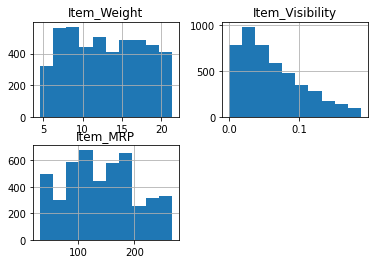

In [26]:
my_plot = df[["Item_Weight", "Item_Visibility", "Item_MRP"]].hist()

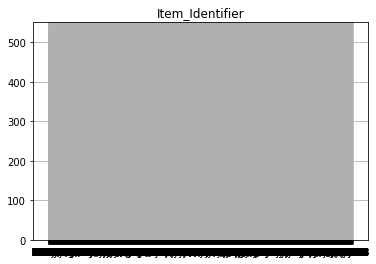

<Figure size 432x288 with 0 Axes>

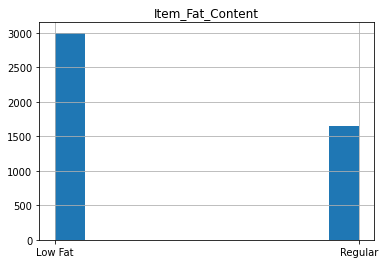

<Figure size 432x288 with 0 Axes>

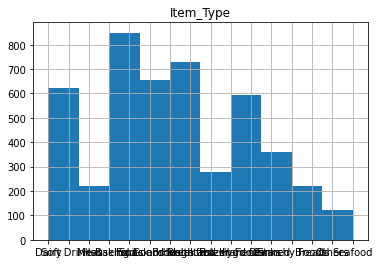

<Figure size 432x288 with 0 Axes>

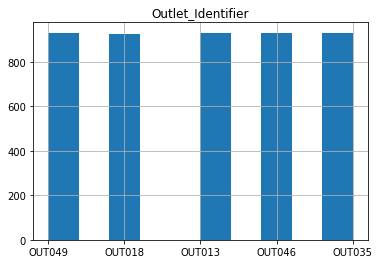

<Figure size 432x288 with 0 Axes>

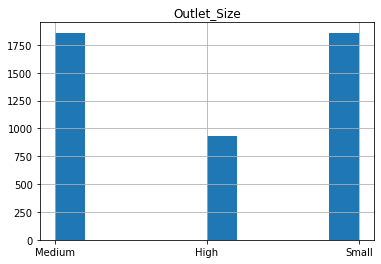

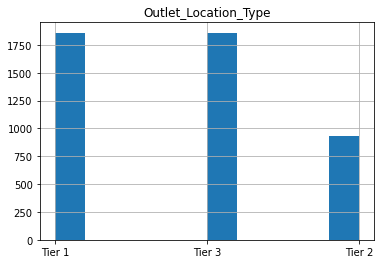

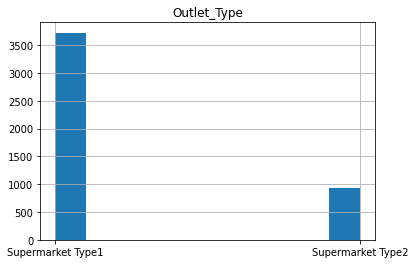

<Figure size 432x288 with 0 Axes>

In [42]:
c = 1
for columna in df.columns:
  plt.figure(c)
  c += 1 # se asigna graficos distintos
  if df[columna].dtype == np.dtype("O"):
    grafico = df[columna].hist()
    grafico.set_title(columna)

In [ ]:
# Podemos dicer que la comiba baja en grasa se vende már en comparación a la regular
# Las tallas mediana y pequeña se venden más que las grandes

Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos

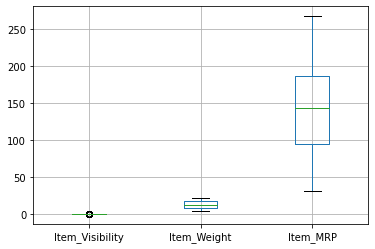

In [43]:
df[["Item_Visibility", "Item_Weight", "Item_MRP"]].boxplot()

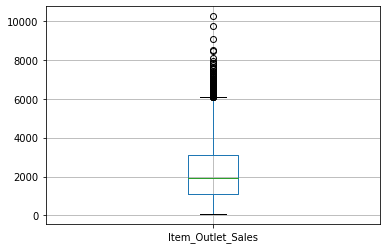

In [45]:
df[["Item_Outlet_Sales"]].boxplot()

In [ ]:
# Los valores en negros corresponden a valores atipicos. 
# el promedio es confiable sin considerar valores atipicos 

In [48]:
tabla = pd.pivot_table(df, "Item_MRP", "Item_Type", "Item_Fat_Content", "mean")
tabla

Item_Fat_Content,Low Fat,Regular
Item_Type,,
Baking Goods,122.035248,129.368038
Breads,135.107435,149.202314
Breakfast,166.184200,117.199358
Canned,139.119003,137.920263
Dairy,147.538105,152.666432
Frozen Foods,141.924743,138.243766
Fruits and Vegetables,135.146012,156.322641
Hard Drinks,140.102908,NaN
Health and Hygiene,131.437324,NaN


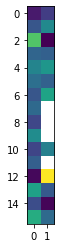

In [49]:
plt.imshow(tabla)

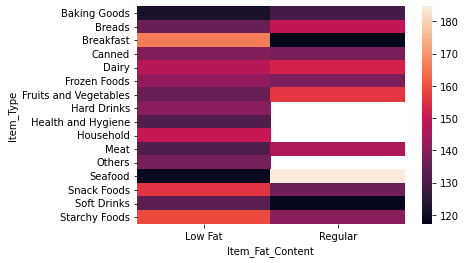

In [50]:
import seaborn as sns
sns.heatmap(tabla)

In [60]:
# podemos ver que el costo de la comida regular y baja en grasa tiene una media similar en costo